# Clasificación K-Nearest Neighbours


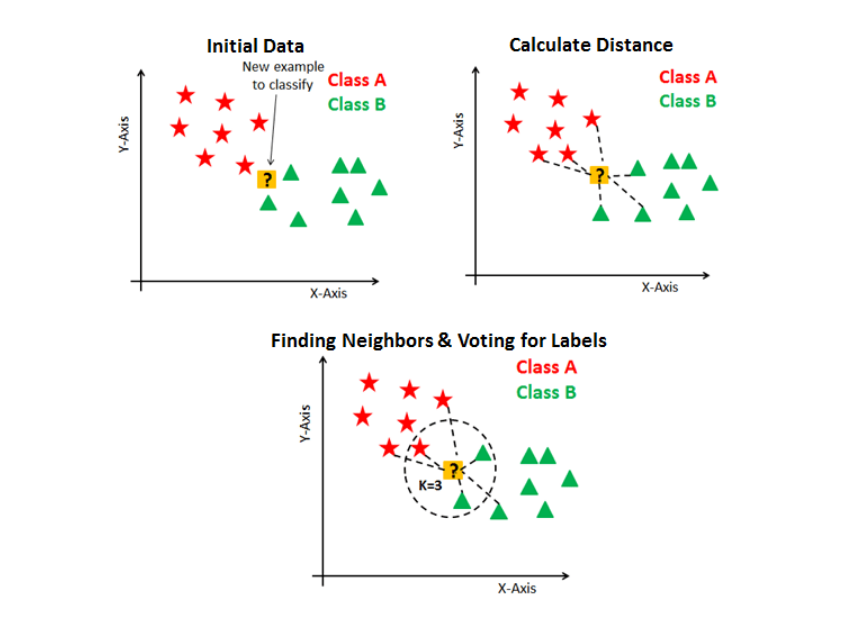

En este ejercicio trabjeremos con el dataset de prueba que ofrece sklearn.

El dataset consta de características químicas sobre unas muestras de vino que pueden corresponder a 3 tipos de vinos diferentes.

In [ ]:
import numpy   as np
import scipy   as sc
import pandas  as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine

In [ ]:
wine_data = load_wine()

X = wine_data.data
Y = wine_data.target

## 1. Clasificando con KNN
---
**Tarea:** Utilizar Sklearn para generar una partición aleatoria de 70%/30% del dataset para generar los conjuntos *X_train* e *Y_train* y también una *X_test* e *Y_test.* Posteriormente hacer uso del modelo KNeighborsClassifier de la librería para clasificar cada botella de vino, y evalúa la calidad de tu modelo.

1. Reportar los resultados de realizar el entrenamiento y la evaluación del modelo a partir de usar variables de entrada normalizadas y sin normalizar. **¿Cuál arroja mejor resultado?**

2. Repetir el entrenamiento y la evaluación para diferentes valores de *k*, en un rango que varíe de 1 a 30. Obtenenr para cada modelo su error de validación y visualizar en un gráfica cuál es la evolución del error de validación con respecto a la variación de *k*. **¿Sería correcto elegir el valor de k que mejor resultado arroje?**

3. Prueba a realizar la selección del hiperparámetro *k* haciendo uso de la técnica de k-fold Cross-Validation. En el siguiente tutorial se encuentra la documentación de Sklearn para entender cómo hacer uso de este método: https://scikit-learn.org/stable/modules/cross_validation.html



4.66735072755122e-16 1.0



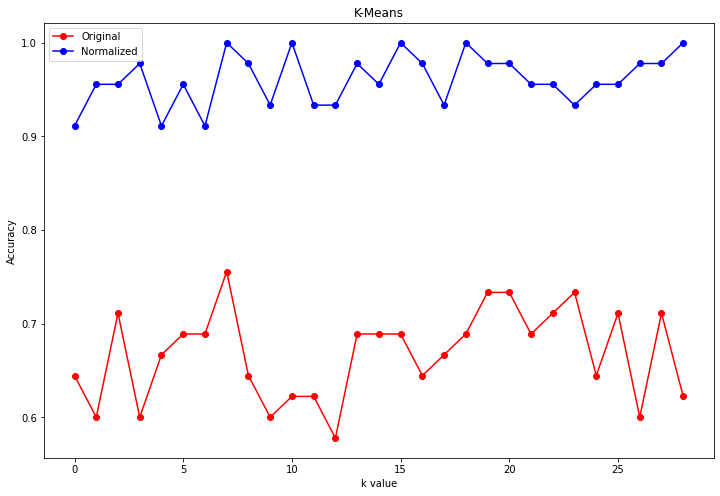

In [ ]:
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import train_test_split

# Apartados 1) y 2)

# Normalizamos las variables.
Xn = StandardScaler().fit_transform(X)

# Comprobamos que X está normalizada con media=0 y std=1.
print(np.mean(Xn), np.std(Xn))

k_max   = 30
results = np.zeros((k_max-1, 2))

# Iteramos para diferentes valores de k.
for i in range(1, k_max):

  # Entrenamos al modelo con los datos originales.
  X_train, X_test, y_train, y_test = train_test_split(X, Y)
  model = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
  results[i-1, 0] = model.score(X_test, y_test)

  # Entrenamos al modelo con los datos normalizados.
  X_train, X_test, y_train, y_test = train_test_split(Xn, Y)
  model = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
  results[i-1, 1] = model.score(X_test, y_test)

#Esto es solo para hacer más grande el gráfico
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 8))

plt.plot(range(len(results)), results[:, 0], "-ro", label='Original')
plt.plot(range(len(results)), results[:, 1], "-bo", label='Normalized')
plt.title('K-Means')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.legend()

print("")

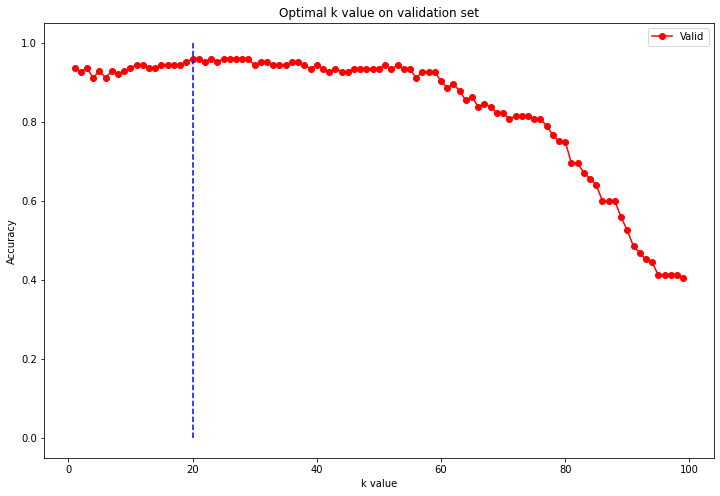

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


# Apartado 3)

for _ in range(1):

  # Normalizamos la matriz de entrada.
  Xn = StandardScaler().fit_transform(X)

  # Generamos un train y un test set.
  X_TR, X_test, Y_TR, Y_test = train_test_split(Xn, Y, test_size=0.3)

  accuracy_tr = []

  _K = range(1, 100)

  # Creamos el objeto que generará los conjuntos del 10-CV
  kf = KFold(n_splits=10)

  accuracy_tr = []

  for k in _K:

    neigh = KNeighborsClassifier(n_neighbors=k)

    accuracy_tr.append(np.mean(cross_val_score(neigh, X_TR, Y_TR, cv=10)))

  figure(num=None, figsize=(12, 8))  
  plt.plot(_K, accuracy_tr, "-ro", label="Valid", alpha=1)

  # Comprobamos en el dataset de test si la K
  # seleccionada realmente nos da la mejor accuracy.

  opt_k = np.argmax(accuracy_tr)+1
  
  plt.plot([opt_k, opt_k], [0, 1], 'b--', alpha=1)
  plt.xlabel("k value")
  plt.ylabel("Accuracy")
  plt.title("Optimal k value on validation set")
  plt.legend()

plt.show()

## 2. (Bonus) Visualizando KNN
---

**Tarea:** Implementar una función ***visualize_KNN($X_1$, $X_2$, $Y$, $k$, $dist$)*** que tome como parámetros de entrada dos variables de entrada $x1$ y $x2$ y el vector de etiquetas $Y$ , para que se encargue de visualizar un scatter plot donde se vean estas dos variable de entradas graficadas, indentificando por color el tipo de clase a la que pertence. Esta función deberá de utilizar los parámetros de entrada $k$ (número de valores a usar por KNN) y $dist$ (tipo de función que mide la distancia entre dos puntos) para realizar un KNN que prediga la clase para todas las combinaciones de puntos que se pueden generar en dicho scatter plot, para así poder sobreimpresionar un mapa de color que nos muestre la frontera de decisión del modelo. En la siguiente imagen puedes ver un ejemplo del resultado que se espera obtener:

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_classification_0021.png">

Una vez implementada la función, probar a graficar diferentes variables, para diferentes valores de K y funciones de distancia.

1. ¿Cómo varía el comportamiento de las predicciones según variamos el valor de K?
2. ¿Cómo varía el comportamiento de las predicciones con diferente tipos de funciones de distancia?



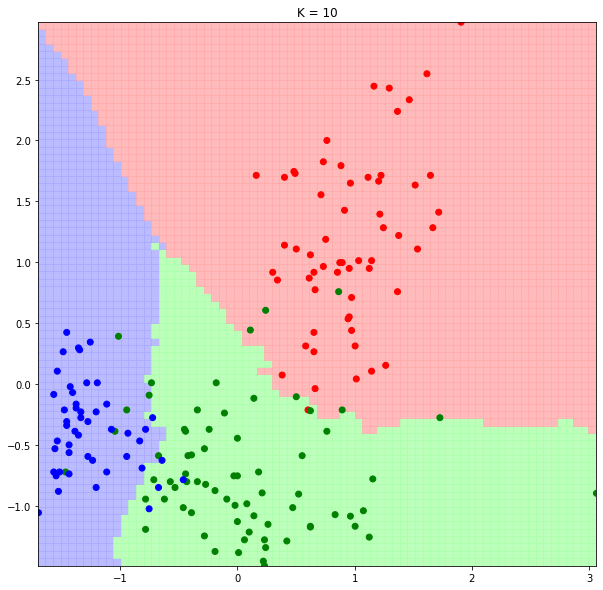

In [ ]:
from matplotlib.colors import ListedColormap

_x1 = X[:,  6: 7]
_x2 = X[:, 12:13]

# Distancia Euclidea de dos puntos.
dist = lambda a, b: np.sqrt(np.sum(np.power(a - b,2)))

def visualize_knn(x1, x2, Y, k, dist):
  
  n_x1 = (x1 - np.mean(x1)) / np.std(x1)
  n_x2 = (x2 - np.mean(x2)) / np.std(x2)
  
  resolution = 75
  
  # Valores del eje X e Y de la malla.
  gx = np.linspace(np.min(n_x1), np.max(n_x1), resolution)
  gy = np.linspace(np.min(n_x2), np.max(n_x2), resolution)  
  
  # Matriz vacía de la malla.
  zz = np.zeros((len(gx), len(gy)))

  # Generamos las coordenadas x e y para cada punto de la malla.
  xx, yy = np.meshgrid(gx, gy)
   
  # Iteramos cada coordenada de la malla.
  for ix in range(len(gx)):
    for iy in range(len(gy)):
        
        # Generamos el punto de la malla.
        grid_p = np.array([xx[ix, iy], 
                           yy[ix, iy]]).reshape(2,1)
        
        # Calcular la distancia para cada punto en la rejilla y los puntos del dataset.
        distances = [dist(np.array([n_x1[ip], n_x2[ip]]), grid_p) for ip in range(len(x1))]
        # Guardar los k indices más cercanos.
        k_index = np.argsort(distances)[:k]
        # Generar las probabilidades para cada clase.
        probs = np.bincount(Y[k_index], minlength=3) / k
        # Elegir la clase de mayor probabilidad.
        pred = np.argmax(probs)
        
        zz[ix, iy] = pred

  color = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
  
  plt.figure(figsize=(10, 10))
  plt.title("K = " + str(k))
  plt.pcolor(xx, yy, zz, cmap=color, alpha=0.8) 
  
  plt.scatter(n_x1, n_x2, c=[{0 : "red", 
                              1 : "green", 
                              2 : "blue"}[k] for k in Y])
  
visualize_knn(_x1, _x2, Y, 10, dist)